In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tennis.csv to tennis.csv
User uploaded file "tennis.csv" with length 408 bytes


In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("tennis.csv")
data.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [5]:
number = LabelEncoder()
data['outlook'] = number.fit_transform(data['outlook'])
data['temp'] = number.fit_transform(data['temp'])
data['humidity'] = number.fit_transform(data['humidity'])
data['windy'] = number.fit_transform(data['windy'])
data['play'] = number.fit_transform(data['play'])
label=data['play']
del data['play']

In [6]:
data.head(5)

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, label, 
                                   test_size = 0.25,random_state = 56)

In [28]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

1.0


In [30]:
data

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [31]:
x_test

,outlook,temp,humidity,windy
8,2,0,1,0
11,0,2,0,1
13,1,2,0,1
3,1,2,0,0


In [33]:
y_test

8     1
11    1
13    0
3     1
Name: play, dtype: int64

In [32]:
x_train

,outlook,temp,humidity,windy
10,2,2,1,1
1,2,1,0,1
12,0,1,1,0
6,0,0,1,1
7,2,2,0,0
9,1,2,1,0
2,0,1,0,0
0,2,1,0,0
4,1,0,1,0
5,1,0,1,1


In [34]:
y_train

10    1
1     0
12    1
6     1
7     0
9     1
2     1
0     0
4     1
5     0
Name: play, dtype: int64

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [38]:
confusion_matrix(y_test, pred)

array([[1, 0],
       [0, 3]])

In [41]:
def plot_confusion_matrix(df_confusion, title='Matriz de confusión', cmap=plt.cm.Greens):
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Clase')
    plt.xlabel('Predicción')

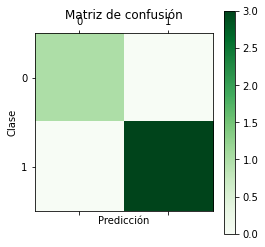

In [42]:
plot_confusion_matrix(confusion_matrix(y_test, pred))